In [14]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
import re
import matplotlib.pyplot as plt
# Regex pattern to find words (Gujarati or English), numbers, or punctuation.
# This is the same pattern from your original code.
WORD_PATTERN = r'(https?://\S+|\w+@\w+\.\w+|\d{1,2}[-/]\d{1,2}[-/]\d{2,4}|\d+\.\d+|\d+|[\u0A80-\u0AFF]+|[a-zA-Z]+|[^\w\s])'

def word_tokenizer(line_of_text):
    """Extracts all tokens from a single line of text."""
    return re.findall(WORD_PATTERN, line_of_text)

def tokenize_and_save(input_file, output_file, lines_to_process):
    """
    Reads a specific number of lines from an input file, tokenizes them,
    and saves each token to a new line in the output file.
    """
    print(f"Starting tokenization of the first {lines_to_process} lines from '{input_file}'...")

    try:
        # Open both the input and output files
        with open(input_file, "r", encoding="utf-8") as in_f, \
             open(output_file, 'w', encoding='utf-8') as out_f:

            # Loop through the input file, but only for the specified number of lines
            for i, current_line in enumerate(in_f):
                if i >= lines_to_process:
                    break  # Stop after processing the desired number of lines

                # Find all word tokens in the current line
                tokens = word_tokenizer(current_line)

                # Write each token to the output file on a new line
                for token in tokens:
                    out_f.write(token + "\n")

        print(f"Processing complete. Tokens have been saved to '{output_file}'.")

    except FileNotFoundError:
        print(f"Error: The input file '{input_file}' was not found. Please check the file path.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# --- Main execution block ---
if __name__ == "__main__":
    # Define the input file, output file, and number of lines to process
    input_filename = "gu.txt"
    output_filename = "tokenized_output.txt"
    num_lines = 100000

    # Run the tokenization process
    tokenize_and_save(input_filename, output_filename, num_lines)

Starting tokenization of the first 100000 lines from 'gu.txt'...
Processing complete. Tokens have been saved to 'tokenized_output.txt'.


Successfully created frequency distribution for 170360 unique tokens.


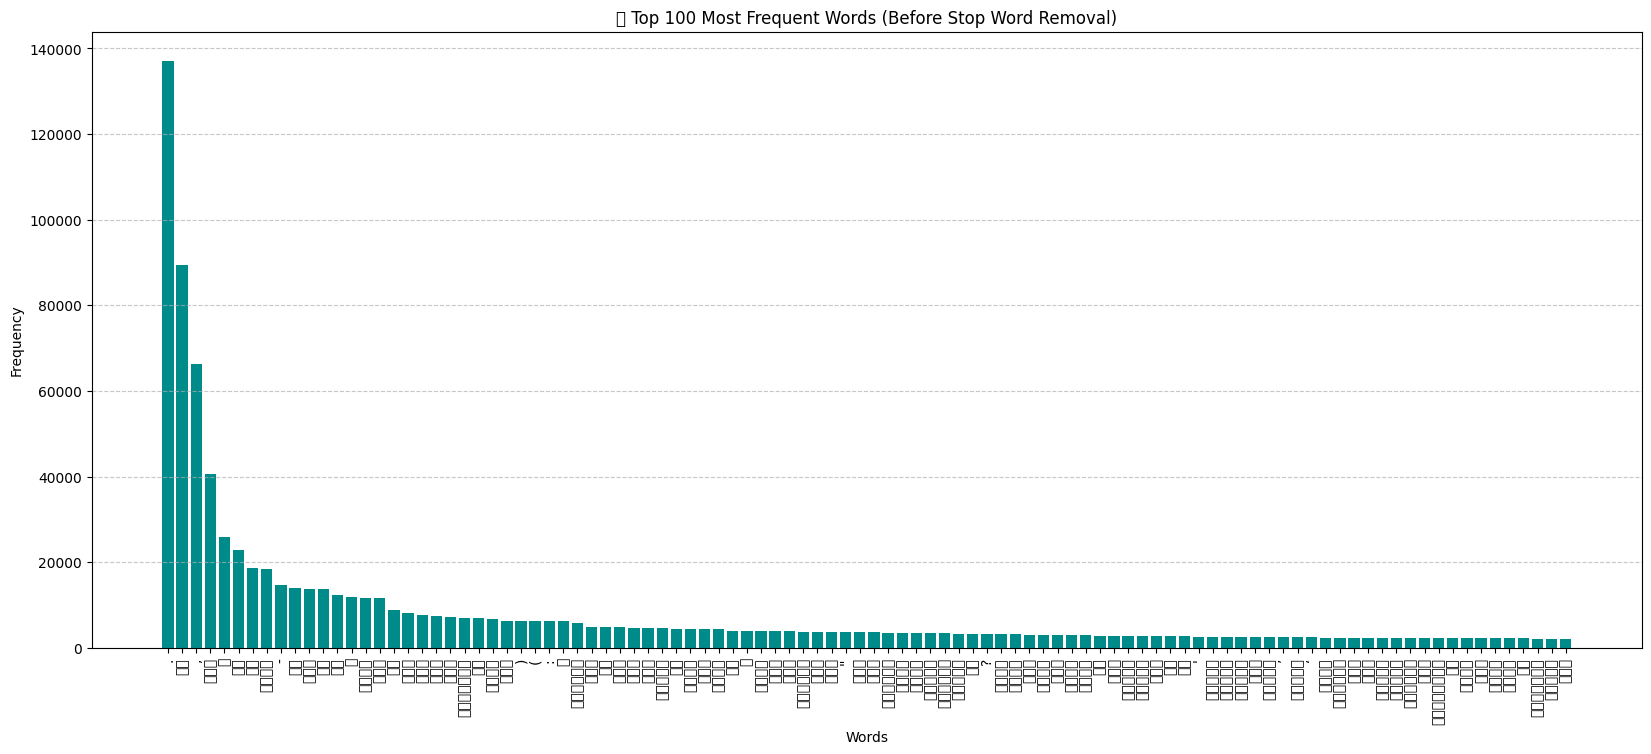


Threshold: >500. Found 513 stop words.
Stop words found (sample): ['!', '"', "'", '(', ')', ',', '-', '.', '/', '1', '10', '11', '12', '15', '2', '20', '3', '30', '4', '5']


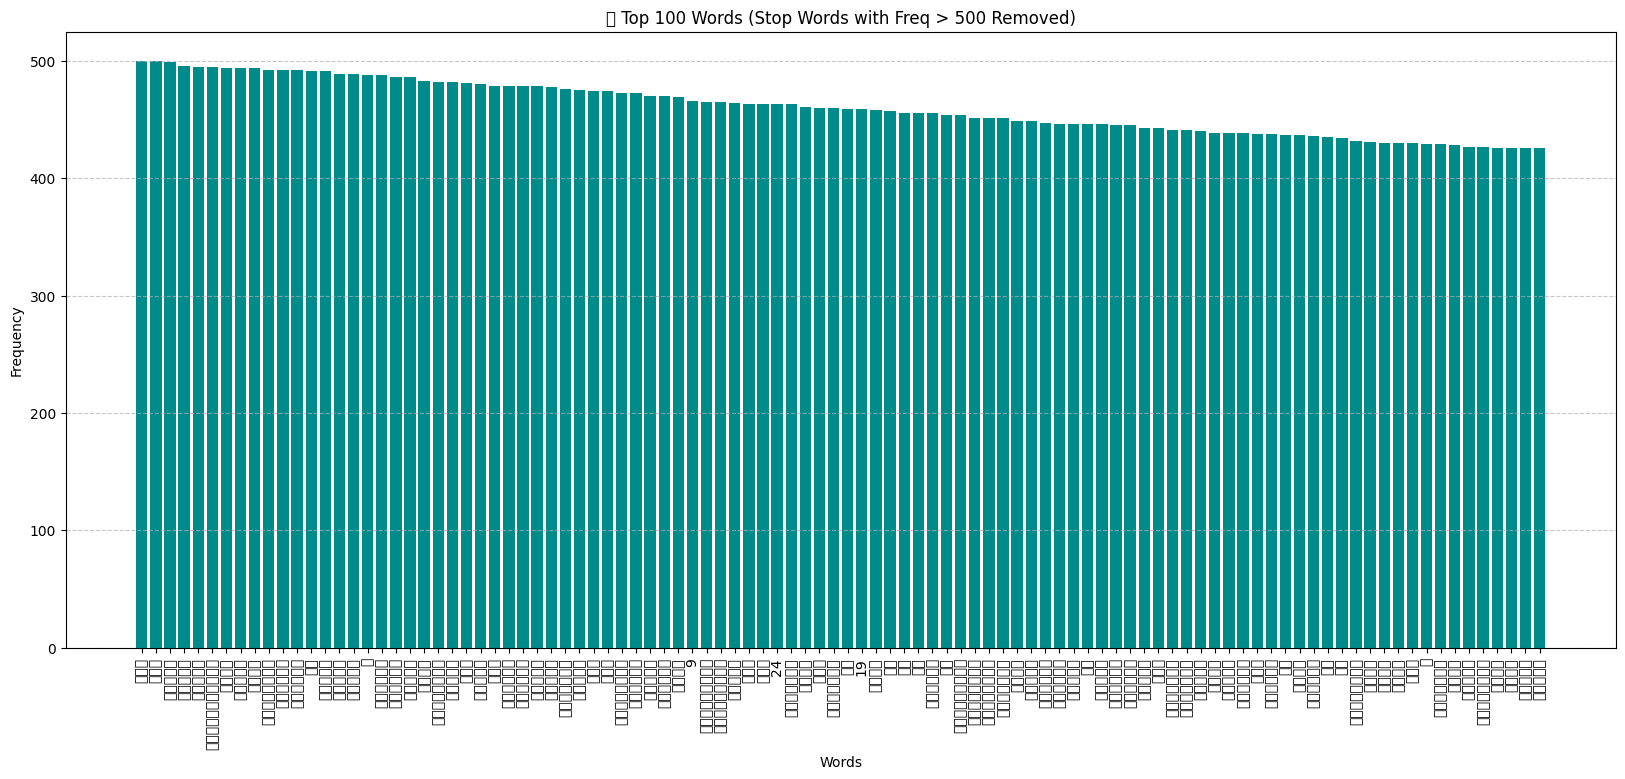


Threshold: >250. Found 1047 stop words.
Stop words found (sample): ['!', '"', '%', "'", '(', ')', ',', '-', '.', '/', '000', '1', '10', '100', '11', '12', '13', '14', '15', '16']


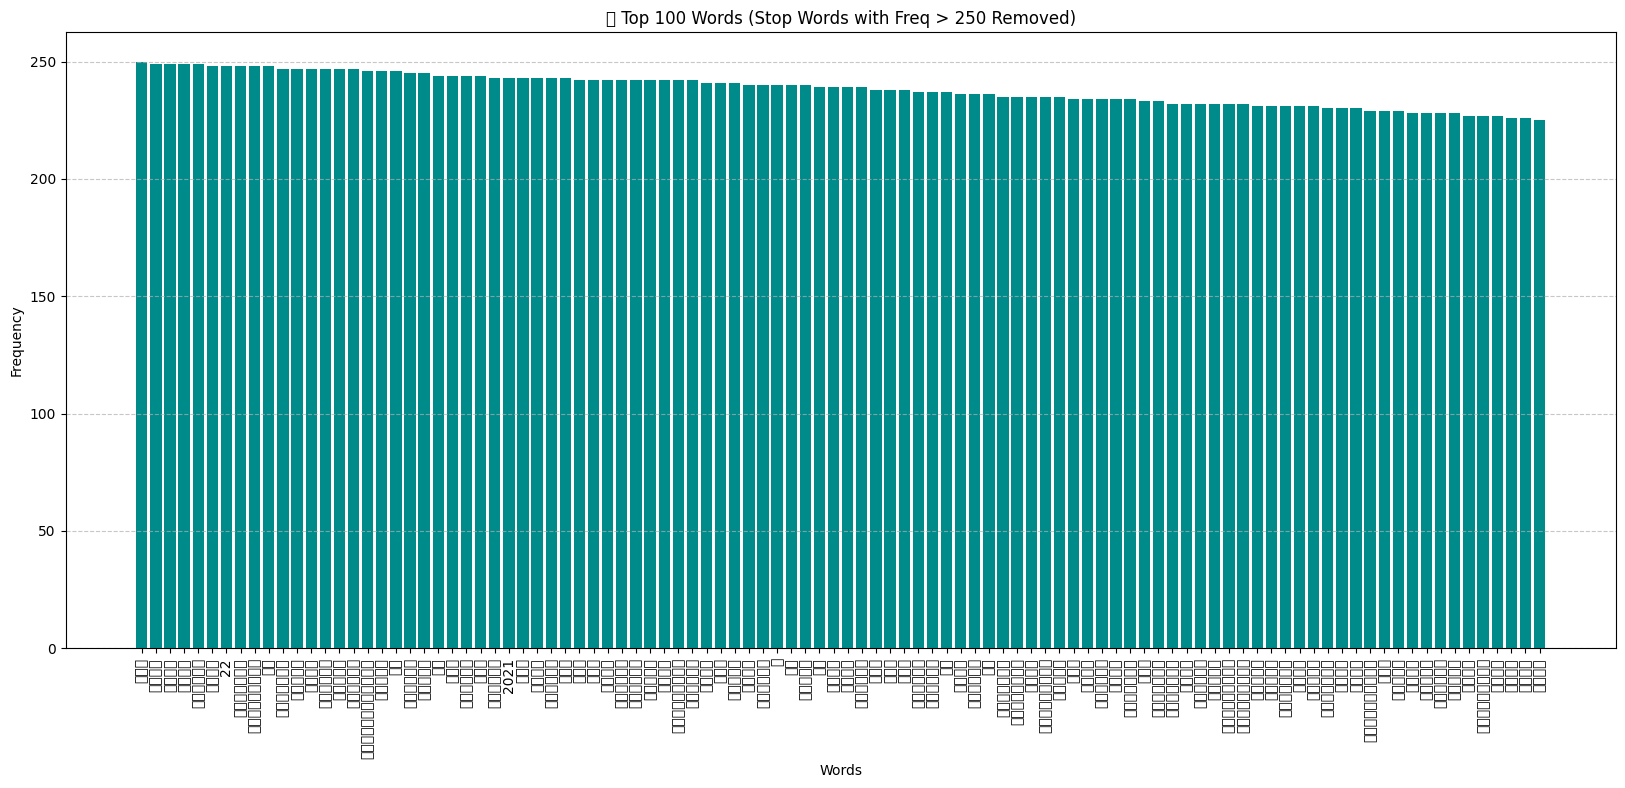


Threshold: >100. Found 2592 stop words.
Stop words found (sample): ['!', '"', '$', '%', "'", '(', ')', '*', ',', '-', '.', '/', '000', '1', '10', '100', '11', '12', '13', '14']


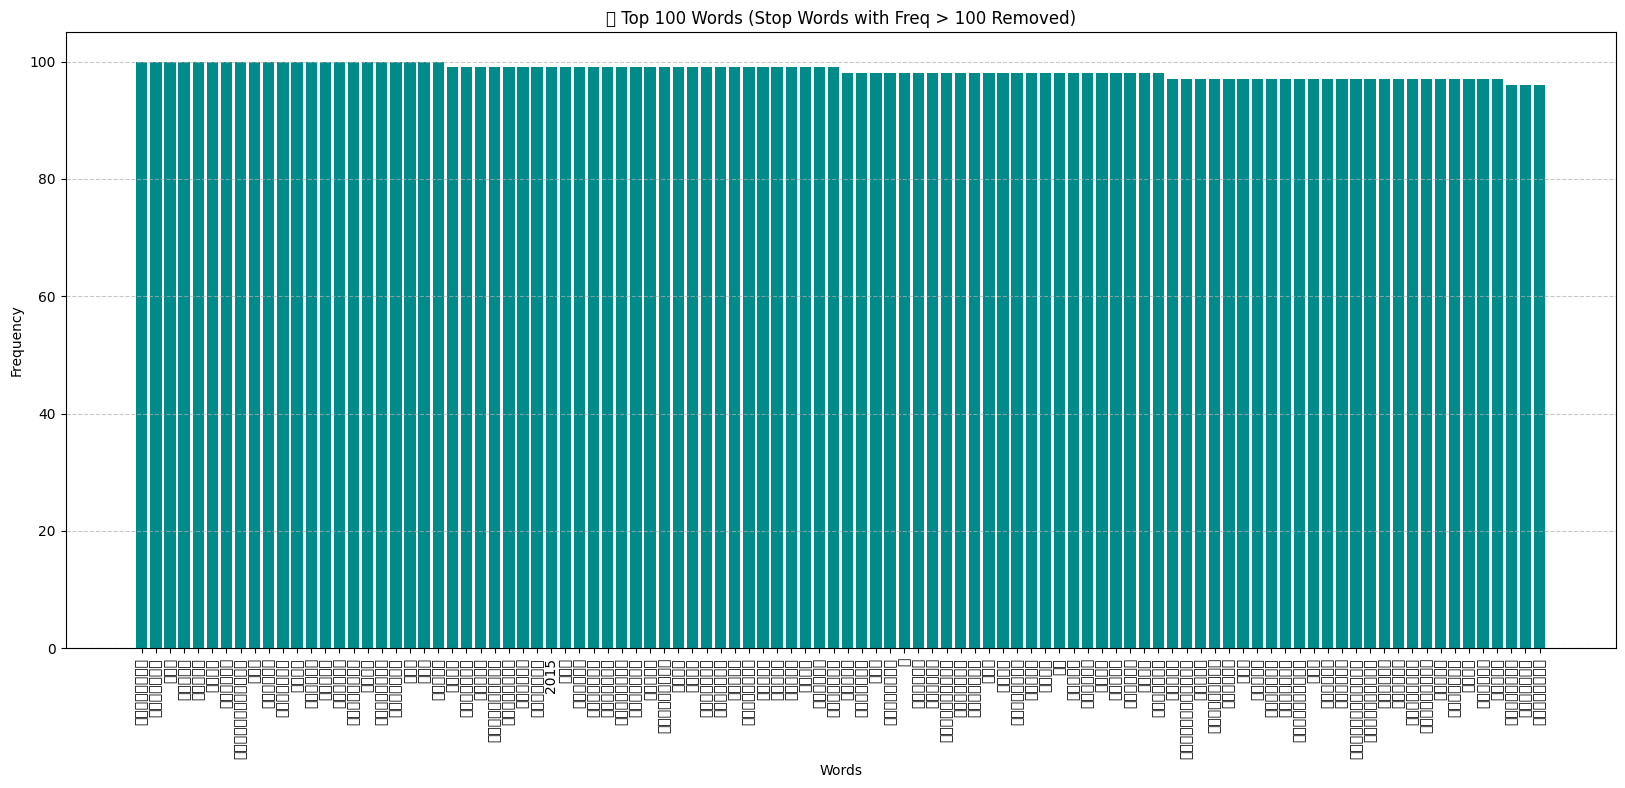

In [26]:
import matplotlib.pyplot as plt

# --- Step 1: Read Tokens and Create Frequency Distribution ---

def create_freq_dist(tokens):
    """
    Creates a frequency distribution from a list of tokens.
    This is done manually without using libraries like collections.Counter.
    """
    freq_dist = {}
    for token in tokens:
        # Make the analysis case-insensitive
        token = token.lower()
        if token in freq_dist:
            freq_dist[token] += 1
        else:
            freq_dist[token] = 1
    return freq_dist

# Read the tokenized data from the file
try:
    with open('tokenized_output.txt', 'r', encoding='utf-8') as f:
        all_tokens = [line.strip() for line in f if line.strip()]
except FileNotFoundError:
    print("Error: 'tokenized_output.txt' not found.")
    print("Please make sure your tokenized dataset is in the same directory.")
    all_tokens = [] # Set to empty list to avoid crashing

# Create the initial frequency distribution
if all_tokens:
    initial_freq_dist = create_freq_dist(all_tokens)
    print(f"Successfully created frequency distribution for {len(initial_freq_dist)} unique tokens.")
else:
    initial_freq_dist = {}


# --- Step 2: Plot the Top 100 Most Frequent Words ---

def plot_freq_dist(freq_dist, top_n, title):
    """Plots the top N most frequent words from a frequency distribution."""
    # Sort the dictionary by value (frequency) in descending order
    sorted_items = sorted(freq_dist.items(), key=lambda item: item[1], reverse=True)

    # Get the top N words and their frequencies
    top_words = [item[0] for item in sorted_items[:top_n]]
    top_freqs = [item[1] for item in sorted_items[:top_n]]

    # Create the plot
    plt.figure(figsize=(20, 8))
    plt.bar(top_words, top_freqs, color='darkcyan')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

if initial_freq_dist:
    plot_freq_dist(
        initial_freq_dist,
        top_n=100,
        title='📊 Top 100 Most Frequent Words (Before Stop Word Removal)'
    )


# --- Step 3 & 4: Identify Stop Words and Plot Again for 3 Thresholds ---

def remove_stopwords_by_freq(freq_dist, threshold):
    """
    Identifies stop words as words with frequency > threshold
    and returns a new distribution without them.
    """
    # Find words to remove based on the frequency threshold
    stop_words = {word for word, freq in freq_dist.items() if freq > threshold}

    print(f"\nThreshold: >{threshold}. Found {len(stop_words)} stop words.")
    # Show only a sample of stop words if the list is too long
    stop_words_sample = sorted(list(stop_words))[:20]
    print(f"Stop words found (sample): {stop_words_sample}")

    # Create a new dictionary without the stop words
    filtered_dist = {
        word: freq for word, freq in freq_dist.items() if word not in stop_words
    }
    return filtered_dist

if initial_freq_dist:
    # NOTE: You may need to adjust these threshold values based on your corpus size
    # to get meaningful results.
    thresholds = [500, 250, 100]

    for i, threshold_val in enumerate(thresholds, 1):
        filtered_dist = remove_stopwords_by_freq(initial_freq_dist, threshold_val)
        plot_freq_dist(
            filtered_dist,
            top_n=100,
            title=f'🗑️ Top 100 Words (Stop Words with Freq > {threshold_val} Removed)'
        )